# Exercise 6

## Predict rating using LSTM


In [1]:
import pandas as pd

In [2]:
dataTraining = pd.read_csv('https://github.com/sergiomora03/AdvancedTopicsAnalytics/raw/main/datasets/dataTraining.zip', encoding='UTF-8', index_col=0)

In [3]:
X = dataTraining['plot']
y = (dataTraining['rating'] >= dataTraining['rating'].mean()).astype(int)

In [4]:
X

3107    most is the story of a single father who takes...
900     a serial killer decides to teach the secrets o...
6724    in sweden ,  a female blackmailer with a disfi...
4704    in a friday afternoon in new york ,  the presi...
2582    in los angeles ,  the editor of a publishing h...
                              ...                        
8417    " our marriage ,  their wedding .  "  it ' s l...
1592    the wandering barbarian ,  conan ,  alongside ...
1723    like a tale spun by scheherazade ,  kismet fol...
7605    mrs .  brisby ,  a widowed mouse ,  lives in a...
215     tinker bell journey far north of never land to...
Name: plot, Length: 7895, dtype: object

In [5]:
y

3107    1
900     0
6724    1
4704    1
2582    1
       ..
8417    0
1592    0
1723    0
7605    1
215     1
Name: rating, Length: 7895, dtype: int64

# Exercise 6.1

- Remove stopwords
- Lowercase
- split the text in words
- pad_sequences

In [6]:
!pip install wget
!pip install livelossplot --quiet

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=03593685da9d06de499d6cb7d5c61684012c4b41e4f053b5dfe40879b2ab6092
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [7]:
import pandas as pd
import numpy as np
import wget
import os
from zipfile import ZipFile

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string

from sklearn.model_selection import train_test_split

from keras import backend as K
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences
from livelossplot import PlotLossesKeras

import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec
import warnings


warnings.filterwarnings('ignore')
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
stop_words = set(stopwords.words('english'))#SET STOPWORDS
def preprocess(text):
    text = text.lower() #LOWERCASE
    text = ''.join([word for word in text if word not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X = X.apply(preprocess)

In [9]:
X = X.tolist()

In [10]:
# For vocabulary only the intersec characters is used to avoid issues with data collection
voc = set(''.join(X))
vocabulary = {x: idx + 1 for idx, x in enumerate(set(voc))}

In [68]:
# Max len
max_len = 2000
X = [x[:max_len] for x in X]
# Convert characters to int and pad PAD SEQUENCE
X = [[vocabulary[x1] for x1 in x if x1 in vocabulary.keys()] for x in X]

In [69]:
len(X)

7895

In [70]:
X_pad = pad_sequences(X, maxlen=max_len)

In [71]:
X_pad

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [72]:
# split data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, stratify = y, test_size = 0.3, random_state = 18)

In [73]:
print(X_train.shape)
print(y_train.shape)

(5526, 2000)
(5526,)


# Exercise 6.2

Create a SimpleRNN neural network to predict the rating of a movie

Calculate the testing set accuracy

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Supongamos que X_train tiene forma (150, n_features) y y_train es un vector de 150 elementos con valores 0 o 1
# Donde n_features es el número de características de los datos

# Crear el modelo secuencial
model = Sequential()

# Agregar la capa de entrada y la primera capa oculta
model.add(Dense(units=45, activation='relu', input_dim=max_len))

# Agregar una segunda capa oculta
model.add(Dense(units=12, activation='relu'))

# Agregar una segunda capa oculta
model.add(Dense(units=20, activation='tanh'))

# Agregar una segunda capa oculta
model.add(Dense(units=16, activation='ELU'))


# Agregar la capa de salida
model.add(Dense(units=1, activation='sigmoid'))

# Compilar el modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
173/173 [==============================] - 3s 7ms/step - loss: 0.6921 - accuracy: 0.5273 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 2/100
173/173 [==============================] - 1s 7ms/step - loss: 0.6917 - accuracy: 0.5284 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 3/100
173/173 [==============================] - 1s 7ms/step - loss: 0.6919 - accuracy: 0.5284 - val_loss: 0.6916 - val_accuracy: 0.5285
Epoch 4/100
173/173 [==============================] - 2s 9ms/step - loss: 0.6918 - accuracy: 0.5284 - val_loss: 0.6917 - val_accuracy: 0.5285
Epoch 5/100
173/173 [==============================] - 1s 7ms/step - loss: 0.6918 - accuracy: 0.5284 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 6/100
173/173 [==============================] - 1s 7ms/step - loss: 0.6917 - accuracy: 0.5284 - val_loss: 0.6915 - val_accuracy: 0.5285
Epoch 7/100
173/173 [==============================] - 1s 7ms/step - loss: 0.6916 - accuracy: 0.5284 - val_loss: 0.6920 - val_accuracy: 0.5285

In [75]:
# Evaluar el modelo en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')


75/75 [==============================] - 0s 3ms/step - loss: 0.6915 - accuracy: 0.5285
Test accuracy: 0.5284930467605591


##SIMPLE KERAS

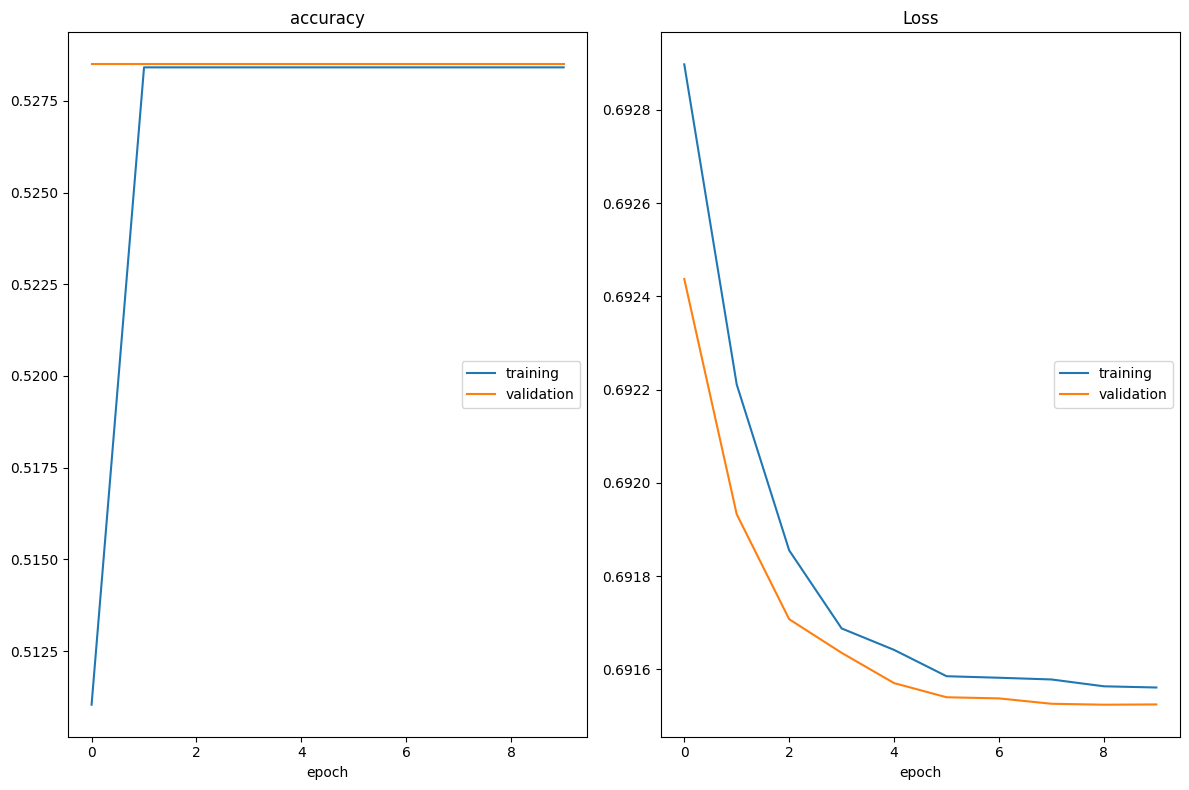

accuracy
	training         	 (min:    0.511, max:    0.528, cur:    0.528)
	validation       	 (min:    0.528, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.692, max:    0.693, cur:    0.692)
	validation       	 (min:    0.692, max:    0.692, cur:    0.692)
44/44 [==============================] - 22s 502ms/step - loss: 0.6916 - accuracy: 0.5284 - val_loss: 0.6915 - val_accuracy: 0.5285


In [76]:
import keras.optimizers as opts

K.clear_session()

model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(Dense(1, activation='sigmoid'))

op = opts.SGD(lr=0.02)

model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

model.summary()

model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

##TD-IDF

In [82]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(stop_words='english')
X_dtm = vect.fit_transform(dataTraining['plot'])
features = vect.vocabulary_.keys()
X_dtm.shape

(7895, 38370)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, test_size=0.33, random_state=42)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_dtm, y, stratify = y, test_size = 0.3, random_state = 42)

In [84]:
print(X_train.shape)
print(y_train.shape)

(5526, 38370)
(5526,)


In [81]:
print(X_train.shape[1])

38370


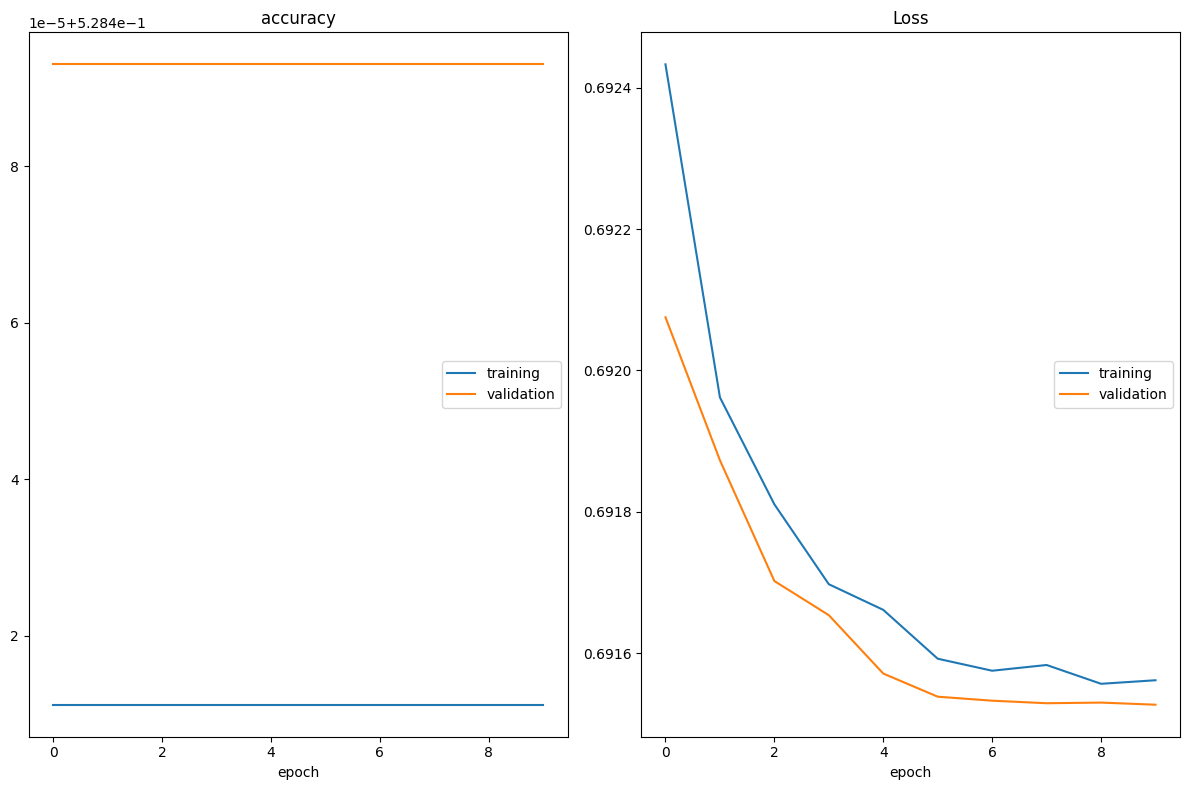

accuracy
	training         	 (min:    0.528, max:    0.528, cur:    0.528)
	validation       	 (min:    0.528, max:    0.528, cur:    0.528)
Loss
	training         	 (min:    0.692, max:    0.692, cur:    0.692)
	validation       	 (min:    0.692, max:    0.692, cur:    0.692)
44/44 [==============================] - 222s 5s/step - loss: 0.6916 - accuracy: 0.5284 - val_loss: 0.6915 - val_accuracy: 0.5285


In [86]:
import keras.optimizers as opts
K.clear_session()

model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=38370))
model.add(Dense(1, activation='sigmoid'))

op = opts.SGD(lr=0.02)

model.compile(loss='binary_crossentropy', optimizer=op, metrics=['accuracy'])

model.summary()

X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

model.fit(X_train_dense, y_train, validation_data=[X_test_dense, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

# Exercise 6.3

Create a LSTM neural network to predict the rating of a movie

Calculate the testing set accuracy

In [ ]:
!pip install livelossplot --quiet

In [ ]:
import keras
from keras import backend as

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.utils import pad_sequences

In [ ]:
from livelossplot import PlotLossesKeras
%matplotlib inline

In [ ]:
K.clear_session()
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          7296      
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 27937 (109.13 KB)
Trainable params: 27937 (109.13 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


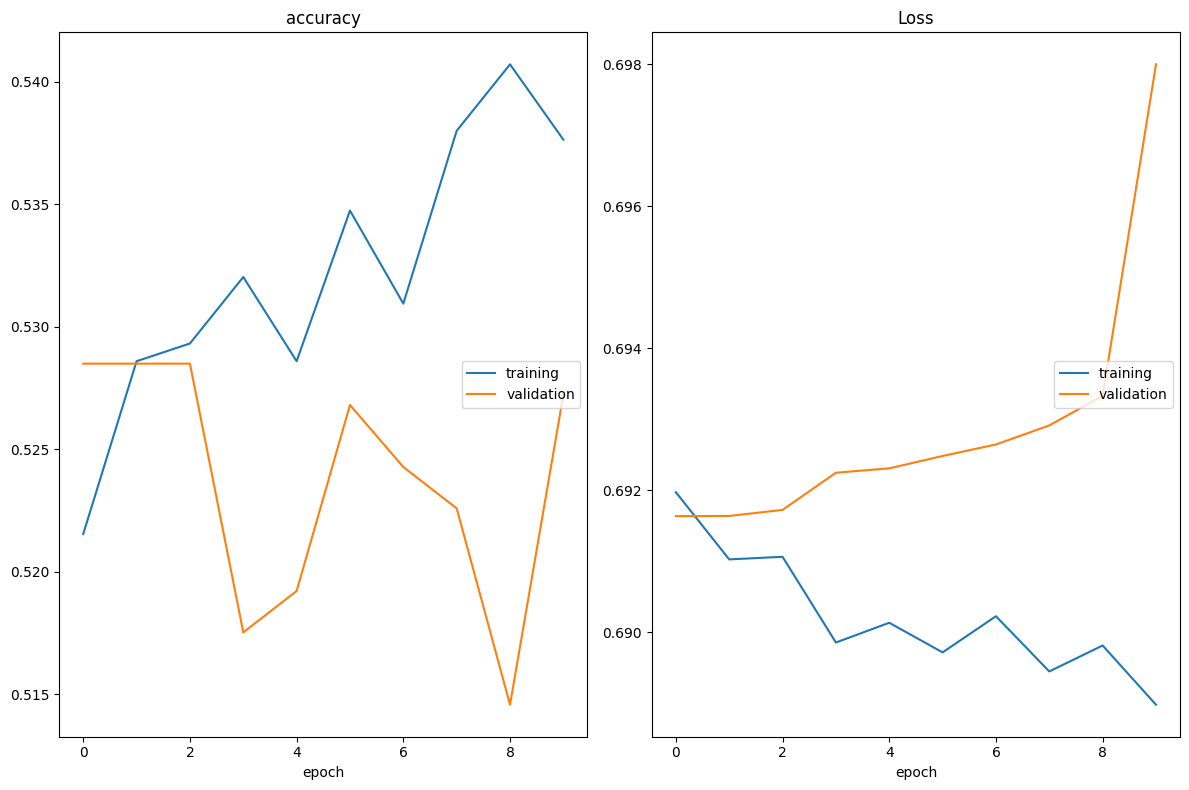

accuracy
	training         	 (min:    0.522, max:    0.541, cur:    0.538)
	validation       	 (min:    0.515, max:    0.528, cur:    0.527)
Loss
	training         	 (min:    0.689, max:    0.692, cur:    0.689)
	validation       	 (min:    0.692, max:    0.698, cur:    0.698)
44/44 [==============================] - 10s 232ms/step - loss: 0.6890 - accuracy: 0.5376 - val_loss: 0.6980 - val_accuracy: 0.5272


In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])

# Exercise 6.4

Create a GRU neural network to predict the rating of a movie

Calculate the testing set accuracy

In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, GRU, Dense

In [ ]:
model = Sequential()
model.add(Embedding(len(vocabulary) + 1, 128, input_length=max_len))
model.add(GRU(32))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 150, 128)          7296      
                                                                 
 gru_9 (GRU)                 (None, 32)                15552     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 22881 (89.38 KB)
Trainable params: 22881 (89.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


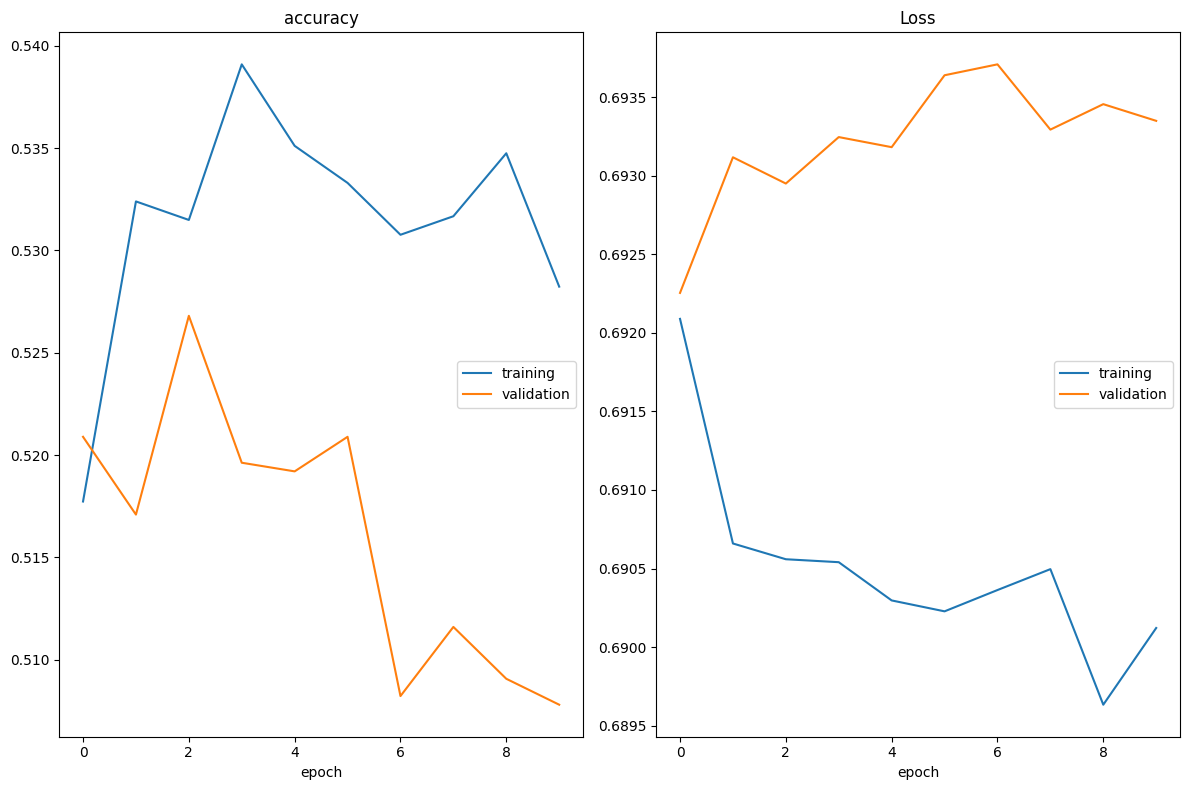

accuracy
	training         	 (min:    0.518, max:    0.539, cur:    0.528)
	validation       	 (min:    0.508, max:    0.527, cur:    0.508)
Loss
	training         	 (min:    0.690, max:    0.692, cur:    0.690)
	validation       	 (min:    0.692, max:    0.694, cur:    0.693)
44/44 [==============================] - 10s 233ms/step - loss: 0.6901 - accuracy: 0.5282 - val_loss: 0.6933 - val_accuracy: 0.5078


In [ ]:
model.fit(X_train, y_train, validation_data=[X_test, y_test],
          batch_size=128, epochs=10, verbose=1,
          callbacks=[PlotLossesKeras()])